<a href="https://colab.research.google.com/github/Mousami7/Mousami_model-architecture-in-python/blob/main/Copy_of_Model_Architecture_Search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Link to video accompanying this notebook - https://www.youtube.com/watch?v=-7TZ-IKMJi8

In [ ]:
!git clone https://github.com/google/model_search.git

fatal: destination path 'model_search' already exists and is not an empty directory.


In [ ]:
%cd model_search
!pwd

/content/model_search
/content/model_search


In [ ]:
!ls 

CONTRIBUTING.md     LICENSE	  README.md	    WORKSPACE
credit_default.xls  model_search  requirements.txt


In [ ]:
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!ls model_search

architecture	       hparams		    phoenix_test.py
block_builder.py       images		    proto
block_builder_test.py  __init__.py	    __pycache__
block.py	       logit_bundler.py     registry.py
block_test.py	       loss_fns.py	    registry_test.py
BUILD		       loss_fns_test.py     search
configs		       meta		    single_trainer.py
constants.py	       metadata		    single_trainer_test.py
controller.py	       metric_fns.py	    task_manager.py
controller_test.py     metric_fns_test.py   task_manager_test.py
data		       ops		    testdata
ensembler.py	       oss_trainer_lib.py   trainer.bzl
ensembler_test.py      oss_trainer.py	    utils.py
generators	       oss_trainer_test.py  utils_test.py
hparam.py	       phoenix.py


In [ ]:
!protoc --python_out=./ model_search/proto/phoenix_spec.proto
!protoc --python_out=./ model_search/proto/hparam.proto
!protoc --python_out=./ model_search/proto/distillation_spec.proto
!protoc --python_out=./ model_search/proto/ensembling_spec.proto
!protoc --python_out=./ model_search/proto/transfer_learning_spec.proto

In [ ]:
!wget -O credit_default.xls https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls

--2022-07-20 15:41:35--  https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5539328 (5.3M) [application/x-httpd-php]
Saving to: ‘credit_default.xls’

credit_default.xls  100%[===================>]   5.28M  3.91MB/s    in 1.4s    

2022-07-20 15:41:37 (3.91 MB/s) - ‘credit_default.xls’ saved [5539328/5539328]



In [ ]:
!ls

CONTRIBUTING.md     LICENSE	  README.md	    WORKSPACE
credit_default.xls  model_search  requirements.txt


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler

import model_search
from model_search import constants
from model_search import single_trainer
from model_search.data import csv_data


In [ ]:
!pip install --upgrade pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
data=pd.read_excel('/content/default of credit card clients.xls',skiprows=1)
data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [ ]:
data=data.rename({'default payment next month':'default'}, axis=1)

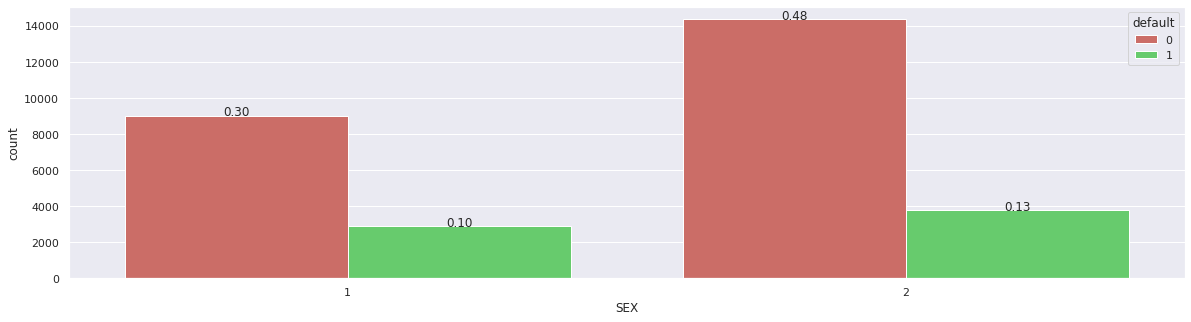

In [ ]:
sns.set(style="darkgrid")
sns.set_palette("hls", 3)
fig, ax = plt.subplots(figsize=(20,5))
ax = sns.countplot(x="SEX", hue="default", data=data)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/data.shape[0]),
            ha="center") 

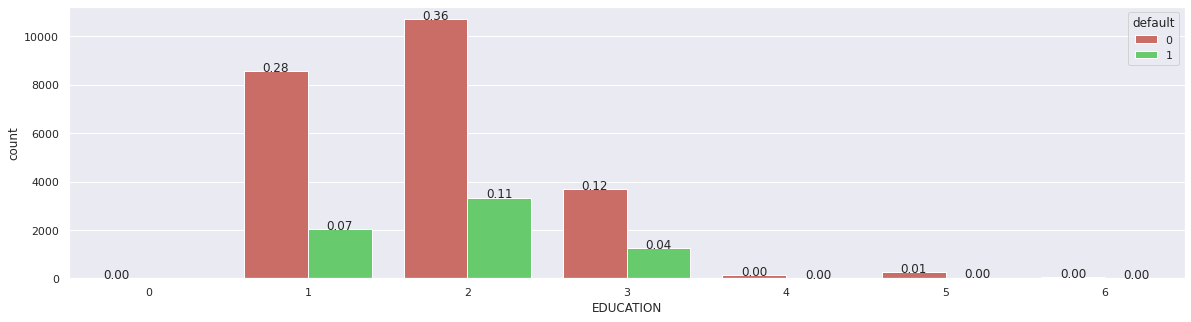

In [ ]:
sns.set(style="darkgrid")
sns.set_palette("hls", 3)
fig, ax = plt.subplots(figsize=(20,5))
ax = sns.countplot(x="EDUCATION", hue="default", data=data)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/data.shape[0]),
            ha="center") 

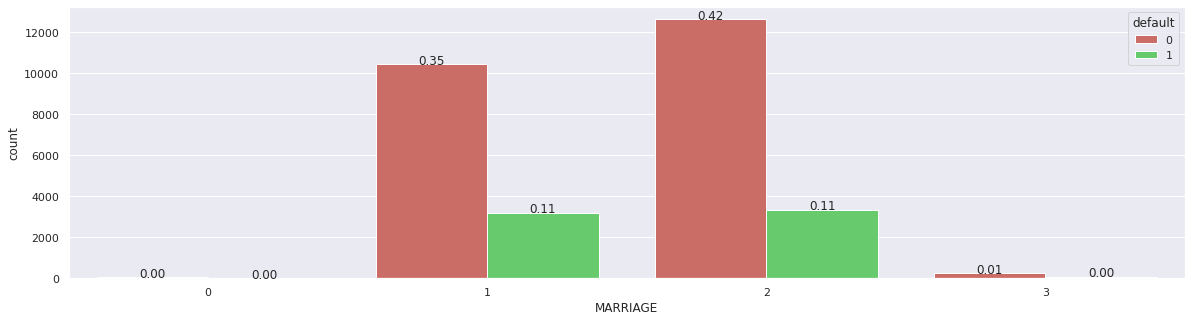

In [ ]:
sns.set(style="darkgrid")
sns.set_palette("hls", 3)
fig, ax = plt.subplots(figsize=(20,5))
ax = sns.countplot(x="MARRIAGE", hue="default", data=data)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/data.shape[0]),
            ha="center") 

In [ ]:
categorical=['SEX',	'EDUCATION',	'MARRIAGE']
numeric=['PAY_0',	'PAY_2',	'PAY_3',	'PAY_4',	'PAY_5',	'PAY_6']

In [ ]:
data_final=pd.get_dummies(data=data[categorical], columns=['SEX',	'EDUCATION',	'MARRIAGE'])
data_final

,SEX_1,SEX_2,EDUCATION_0,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,0,1,0,0,1,0,0,0,0,0,1,0,0
1,0,1,0,0,1,0,0,0,0,0,0,1,0
2,0,1,0,0,1,0,0,0,0,0,0,1,0
3,0,1,0,0,1,0,0,0,0,0,1,0,0
4,1,0,0,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1,0,0,0,0,1,0,0,0,0,1,0,0
29996,1,0,0,0,0,1,0,0,0,0,0,1,0
29997,1,0,0,0,1,0,0,0,0,0,0,1,0
29998,1,0,0,0,0,1,0,0,0,0,1,0,0


In [ ]:
data_default=pd.concat([data['default'], data_final, data[numeric]],  axis=1)
data_default

,default,SEX_1,SEX_2,EDUCATION_0,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,2,2,-1,-1,-2,-2
1,1,0,1,0,0,1,0,0,0,0,0,0,1,0,-1,2,0,0,0,2
2,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,1,0,0,0,1,0,0,0,0,0,1,0,0,-1,0,-1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
29996,0,1,0,0,0,0,1,0,0,0,0,0,1,0,-1,-1,-1,-1,0,0
29997,1,1,0,0,0,1,0,0,0,0,0,0,1,0,4,3,2,-1,0,0
29998,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,-1,0,0,0,-1


In [ ]:
data_default['default'].value_counts()

0    23364
1     6636
Name: default, dtype: int64

In [ ]:
data_default.to_csv('default.csv',sep = ',', index = False, header = None)

In [ ]:
trainer = single_trainer.SingleTrainer(
    data=csv_data.Provider(label_index=0, logits_dimension=2, record_defaults=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], filename="default.csv"),
    spec='model_search/configs/dnn_config.pbtxt')

In [ ]:
!mkdir /tmp/run_example

In [ ]:
!rm -r /tmp/run_example/

In [ ]:
import sys
from absl import app

# Addresses `UnrecognizedFlagError: Unknown command line flag 'f'`
sys.argv = sys.argv[:1]

# `app.run` calls `sys.exit`
try:
  app.run(lambda argv: None)
except:
  pass

In [ ]:
trainer.try_models(
    number_models=5,
    train_steps=5,
    eval_steps=1,
    root_dir="/tmp/run_example",
    batch_size=512,
    experiment_name="example",
    experiment_owner="model_search_user")

I0720 15:43:30.506975 140551569033088 metadata_store.py:93] MetadataStore with DB connection initialized
I0720 15:43:30.532305 140551569033088 oss_trainer_lib.py:303] creating directory: /tmp/run_example/tuner-1/1
I0720 15:43:30.533778 140551569033088 oss_trainer_lib.py:350] Tuner id: tuner-1
I0720 15:43:30.534944 140551569033088 oss_trainer_lib.py:351] Training with the following hyperparameters: 
I0720 15:43:30.537018 140551569033088 oss_trainer_lib.py:352] {'learning_rate': 1.709883184002279e-05, 'new_block_type': 'FULLY_CONNECTED_PYRAMID', 'optimizer': 'adagrad', 'initial_architecture_0': 'FIXED_OUTPUT_FULLY_CONNECTED_512', 'exponential_decay_rate': 0.9344043005733783, 'exponential_decay_steps': 2, 'gradient_max_norm': 5, 'dropout_rate': 0.2500000081956386, 'initial_architecture': ['FIXED_OUTPUT_FULLY_CONNECTED_512']}


INFO:tensorflow:TF_CONFIG environment variable: {'model_dir': '/tmp/run_example/tuner-1/1', 'session_master': ''}


I0720 15:43:30.539189 140551569033088 run_config.py:549] TF_CONFIG environment variable: {'model_dir': '/tmp/run_example/tuner-1/1', 'session_master': ''}


INFO:tensorflow:Using model_dir in TF_CONFIG: /tmp/run_example/tuner-1/1


I0720 15:43:30.543919 140551569033088 run_config.py:986] Using model_dir in TF_CONFIG: /tmp/run_example/tuner-1/1


INFO:tensorflow:Using config: {'_model_dir': '/tmp/run_example/tuner-1/1', '_tf_random_seed': None, '_save_summary_steps': 2000, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 120, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


I0720 15:43:30.548393 140551569033088 estimator.py:192] Using config: {'_model_dir': '/tmp/run_example/tuner-1/1', '_tf_random_seed': None, '_save_summary_steps': 2000, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 120, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.


W0720 15:43:30.572852 140551569033088 deprecation.py:345] From /usr/local/lib/python3.7/dist-packages/tensorflow/python/training/training_util.py:236: Variable.initialized_value (from tensorflow.python.ops.variables) is deprecated and will be removed in a future version.
Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.


INFO:tensorflow:Calling model_fn.


I0720 15:43:30.681569 140551569033088 estimator.py:1163] Calling model_fn.
I0720 15:43:30.686900 140551569033088 phoenix.py:355] <tensorflow_estimator.python.estimator.run_config.RunConfig object at 0x7fd435b9a5d0>
I0720 15:43:30.689773 140551569033088 phoenix.py:356] /tmp/run_example/tuner-1/1
I0720 15:43:30.703595 140551569033088 controller.py:160] trial id: 1
I0720 15:43:30.706674 140551569033088 controller.py:239] intermix ensemble search mode
I0720 15:43:30.718772 140551569033088 phoenix.py:387] {'search_generator': GeneratorWithTrials(instance=<model_search.generators.search_candidate_generator.SearchCandidateGenerator object at 0x7fd43251fcd0>, relevant_trials=[]), 'prior_generator': GeneratorWithTrials(instance=<model_search.generators.prior_generator.PriorGenerator object at 0x7fd43251f650>, relevant_trials=[])}
I0720 15:43:30.724223 140551569033088 search_candidate_generator.py:123] Creating new architecture: 
I0720 15:43:30.726477 140551569033088 search_candidate_generator.p

INFO:tensorflow:TF_CONFIG environment variable: {'model_dir': '/tmp/run_example/tuner-1/1', 'session_master': ''}


/usr/local/lib/python3.7/dist-packages/keras/legacy_tf_layers/core.py:393: UserWarning: `tf.layers.dropout` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dropout` instead.
  warnings.warn('`tf.layers.dropout` is deprecated and '
/usr/local/lib/python3.7/dist-packages/keras/engine/base_layer_v1.py:1676: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
I0720 15:43:31.141401 140551569033088 run_config.py:549] TF_CONFIG environment variable: {'model_dir': '/tmp/run_example/tuner-1/1', 'session_master': ''}


INFO:tensorflow:Using model_dir in TF_CONFIG: /tmp/run_example/tuner-1/1


I0720 15:43:31.146235 140551569033088 run_config.py:986] Using model_dir in TF_CONFIG: /tmp/run_example/tuner-1/1


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


W0720 15:43:31.254286 140551569033088 deprecation.py:548] From /usr/local/lib/python3.7/dist-packages/tensorflow/python/training/adagrad.py:77: calling Constant.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
The value of AUC returned by this may race with the update so this is deprecated. Please use tf.keras.metrics.AUC instead.


W0720 15:43:31.295347 140551569033088 deprecation.py:345] From /content/model_search/model_search/metric_fns.py:204: auc (from tensorflow.python.ops.metrics_impl) is deprecated and will be removed in a future version.
Instructions for updating:
The value of AUC returned by this may race with the update so this is deprecated. Please use tf.keras.metrics.AUC instead.


INFO:tensorflow:Done calling model_fn.


I0720 15:43:31.495105 140551569033088 estimator.py:1165] Done calling model_fn.


INFO:tensorflow:Create CheckpointSaverHook.


I0720 15:43:31.502093 140551569033088 basic_session_run_hooks.py:546] Create CheckpointSaverHook.


INFO:tensorflow:Graph was finalized.


I0720 15:43:31.654964 140551569033088 monitored_session.py:247] Graph was finalized.


INFO:tensorflow:Running local_init_op.


I0720 15:43:32.383610 140551569033088 session_manager.py:531] Running local_init_op.


INFO:tensorflow:Done running local_init_op.


I0720 15:43:32.400093 140551569033088 session_manager.py:534] Done running local_init_op.


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...


I0720 15:43:32.757144 140551569033088 basic_session_run_hooks.py:614] Calling checkpoint listeners before saving checkpoint 0...


INFO:tensorflow:Saving checkpoints for 0 into /tmp/run_example/tuner-1/1/model.ckpt.


I0720 15:43:32.765294 140551569033088 basic_session_run_hooks.py:618] Saving checkpoints for 0 into /tmp/run_example/tuner-1/1/model.ckpt.


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...


I0720 15:43:32.843112 140551569033088 basic_session_run_hooks.py:626] Calling checkpoint listeners after saving checkpoint 0...


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 1...


I0720 15:55:01.903390 140551569033088 basic_session_run_hooks.py:614] Calling checkpoint listeners before saving checkpoint 1...


INFO:tensorflow:Saving checkpoints for 1 into /tmp/run_example/tuner-1/1/model.ckpt.


I0720 15:55:01.909611 140551569033088 basic_session_run_hooks.py:618] Saving checkpoints for 1 into /tmp/run_example/tuner-1/1/model.ckpt.


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 1...


I0720 15:55:01.976487 140551569033088 basic_session_run_hooks.py:626] Calling checkpoint listeners after saving checkpoint 1...


INFO:tensorflow:loss = 0.94623965, step = 0


I0720 15:55:01.984592 140551569033088 basic_session_run_hooks.py:262] loss = 0.94623965, step = 0


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 5...


I0720 15:55:02.126080 140551569033088 basic_session_run_hooks.py:614] Calling checkpoint listeners before saving checkpoint 5...


INFO:tensorflow:Saving checkpoints for 5 into /tmp/run_example/tuner-1/1/model.ckpt.


I0720 15:55:02.132044 140551569033088 basic_session_run_hooks.py:618] Saving checkpoints for 5 into /tmp/run_example/tuner-1/1/model.ckpt.


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 5...


I0720 15:55:02.205208 140551569033088 basic_session_run_hooks.py:626] Calling checkpoint listeners after saving checkpoint 5...


INFO:tensorflow:Loss for final step: 0.9343302.


I0720 15:55:02.920543 140551569033088 estimator.py:351] Loss for final step: 0.9343302.


INFO:tensorflow:Calling model_fn.


I0720 15:55:02.974090 140551569033088 estimator.py:1163] Calling model_fn.
I0720 15:55:02.980122 140551569033088 phoenix.py:355] <tensorflow_estimator.python.estimator.run_config.RunConfig object at 0x7fd435b9a5d0>
I0720 15:55:02.981718 140551569033088 phoenix.py:356] /tmp/run_example/tuner-1/1
I0720 15:55:02.996211 140551569033088 controller.py:160] trial id: 1
I0720 15:55:02.997813 140551569033088 controller.py:239] intermix ensemble search mode
I0720 15:55:03.011489 140551569033088 phoenix.py:387] {'search_generator': GeneratorWithTrials(instance=<model_search.generators.search_candidate_generator.SearchCandidateGenerator object at 0x7fd43251fcd0>, relevant_trials=[]), 'prior_generator': GeneratorWithTrials(instance=<model_search.generators.prior_generator.PriorGenerator object at 0x7fd43251f650>, relevant_trials=[])}
I0720 15:55:03.013365 140551569033088 base_tower_generator.py:99] Building from existing checkpoint.
I0720 15:55:03.028516 140551569033088 phoenix.py:387] {'search_gen

INFO:tensorflow:TF_CONFIG environment variable: {'model_dir': '/tmp/run_example/tuner-1/1', 'session_master': ''}


I0720 15:55:03.157129 140551569033088 run_config.py:549] TF_CONFIG environment variable: {'model_dir': '/tmp/run_example/tuner-1/1', 'session_master': ''}


INFO:tensorflow:Using model_dir in TF_CONFIG: /tmp/run_example/tuner-1/1


I0720 15:55:03.164265 140551569033088 run_config.py:986] Using model_dir in TF_CONFIG: /tmp/run_example/tuner-1/1


INFO:tensorflow:Done calling model_fn.


I0720 15:55:03.409966 140551569033088 estimator.py:1165] Done calling model_fn.


INFO:tensorflow:Starting evaluation at 2022-07-20T15:55:03


I0720 15:55:03.437344 140551569033088 evaluation.py:255] Starting evaluation at 2022-07-20T15:55:03


INFO:tensorflow:Graph was finalized.


I0720 15:55:03.503076 140551569033088 monitored_session.py:247] Graph was finalized.


INFO:tensorflow:Restoring parameters from /tmp/run_example/tuner-1/1/model.ckpt-5


I0720 15:55:03.515524 140551569033088 saver.py:1298] Restoring parameters from /tmp/run_example/tuner-1/1/model.ckpt-5


INFO:tensorflow:Running local_init_op.


I0720 15:55:03.565615 140551569033088 session_manager.py:531] Running local_init_op.


INFO:tensorflow:Done running local_init_op.


I0720 15:55:03.586952 140551569033088 session_manager.py:534] Done running local_init_op.


INFO:tensorflow:Evaluation [1/1]


I0720 15:55:03.761735 140551569033088 evaluation.py:167] Evaluation [1/1]


INFO:tensorflow:Inference Time : 0.43311s


I0720 15:55:03.877461 140551569033088 evaluation.py:273] Inference Time : 0.43311s


INFO:tensorflow:Finished evaluation at 2022-07-20-15:55:03


I0720 15:55:03.884113 140551569033088 evaluation.py:276] Finished evaluation at 2022-07-20-15:55:03


INFO:tensorflow:Saving dict for global step 5: accuracy = 0.47460938, auc_pr = 0.2773189, auc_roc = 0.52483886, global_step = 5, loss = 0.86344874, num_parameters = 200


I0720 15:55:03.888924 140551569033088 estimator.py:2074] Saving dict for global step 5: accuracy = 0.47460938, auc_pr = 0.2773189, auc_roc = 0.52483886, global_step = 5, loss = 0.86344874, num_parameters = 200


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 5: /tmp/run_example/tuner-1/1/model.ckpt-5


I0720 15:55:03.993159 140551569033088 estimator.py:2135] Saving 'checkpoint_path' summary for global step 5: /tmp/run_example/tuner-1/1/model.ckpt-5
I0720 15:55:04.001835 140551569033088 phoenix.py:136] Saving the following evaluation dictionary.
I0720 15:55:04.003493 140551569033088 phoenix.py:137] {'accuracy': 0.474609375, 'auc_pr': 0.27731889486312866, 'auc_roc': 0.5248388648033142, 'loss': 0.8634487390518188, 'num_parameters': 200, 'global_step': 5}
I0720 15:55:04.007572 140551569033088 ml_metadata_db.py:161] Storing the following evaluation dictionary,
I0720 15:55:04.010599 140551569033088 ml_metadata_db.py:162] {'accuracy': 0.474609375, 'auc_pr': 0.27731889486312866, 'auc_roc': 0.5248388648033142, 'loss': 0.8634487390518188, 'num_parameters': 200, 'global_step': 5}
I0720 15:55:04.013763 140551569033088 ml_metadata_db.py:163] For the model in the following model dictionary,
I0720 15:55:04.016840 140551569033088 ml_metadata_db.py:164] /tmp/run_example/tuner-1/1


INFO:tensorflow:Calling model_fn.


I0720 15:55:04.054001 140551569033088 estimator.py:1163] Calling model_fn.
I0720 15:55:04.058873 140551569033088 phoenix.py:355] <tensorflow_estimator.python.estimator.run_config.RunConfig object at 0x7fd435b9a5d0>
I0720 15:55:04.059911 140551569033088 phoenix.py:356] /tmp/run_example/tuner-1/1
I0720 15:55:04.071549 140551569033088 controller.py:160] trial id: 1
I0720 15:55:04.076155 140551569033088 controller.py:239] intermix ensemble search mode
I0720 15:55:04.085415 140551569033088 phoenix.py:387] {'search_generator': GeneratorWithTrials(instance=<model_search.generators.search_candidate_generator.SearchCandidateGenerator object at 0x7fd43251fcd0>, relevant_trials=[<model_search.metadata.trial.Trial object at 0x7fd434834750>]), 'prior_generator': GeneratorWithTrials(instance=<model_search.generators.prior_generator.PriorGenerator object at 0x7fd43251f650>, relevant_trials=[<model_search.metadata.trial.Trial object at 0x7fd434834750>])}
I0720 15:55:04.091275 140551569033088 base_towe

INFO:tensorflow:TF_CONFIG environment variable: {'model_dir': '/tmp/run_example/tuner-1/1', 'session_master': ''}


I0720 15:55:04.236748 140551569033088 run_config.py:549] TF_CONFIG environment variable: {'model_dir': '/tmp/run_example/tuner-1/1', 'session_master': ''}


INFO:tensorflow:Using model_dir in TF_CONFIG: /tmp/run_example/tuner-1/1


I0720 15:55:04.241323 140551569033088 run_config.py:986] Using model_dir in TF_CONFIG: /tmp/run_example/tuner-1/1


INFO:tensorflow:Done calling model_fn.


I0720 15:55:04.253374 140551569033088 estimator.py:1165] Done calling model_fn.


Instructions for updating:
This function will only be available through the v1 compatibility library as tf.compat.v1.saved_model.utils.build_tensor_info or tf.compat.v1.saved_model.build_tensor_info.


W0720 15:55:04.257824 140551569033088 deprecation.py:345] From /usr/local/lib/python3.7/dist-packages/tensorflow/python/saved_model/signature_def_utils_impl.py:201: build_tensor_info (from tensorflow.python.saved_model.utils_impl) is deprecated and will be removed in a future version.
Instructions for updating:
This function will only be available through the v1 compatibility library as tf.compat.v1.saved_model.utils.build_tensor_info or tf.compat.v1.saved_model.build_tensor_info.


INFO:tensorflow:Signatures INCLUDED in export for Classify: None


I0720 15:55:04.264821 140551569033088 export_utils.py:165] Signatures INCLUDED in export for Classify: None


INFO:tensorflow:Signatures INCLUDED in export for Regress: None


I0720 15:55:04.268414 140551569033088 export_utils.py:165] Signatures INCLUDED in export for Regress: None


INFO:tensorflow:Signatures INCLUDED in export for Predict: ['serving_default']


I0720 15:55:04.273662 140551569033088 export_utils.py:165] Signatures INCLUDED in export for Predict: ['serving_default']


INFO:tensorflow:Signatures INCLUDED in export for Train: None


I0720 15:55:04.277252 140551569033088 export_utils.py:165] Signatures INCLUDED in export for Train: None


INFO:tensorflow:Signatures INCLUDED in export for Eval: None


I0720 15:55:04.282640 140551569033088 export_utils.py:165] Signatures INCLUDED in export for Eval: None


INFO:tensorflow:Restoring parameters from /tmp/run_example/tuner-1/1/model.ckpt-5


I0720 15:55:04.326693 140551569033088 saver.py:1298] Restoring parameters from /tmp/run_example/tuner-1/1/model.ckpt-5


INFO:tensorflow:Assets added to graph.


I0720 15:55:04.351475 140551569033088 builder_impl.py:672] Assets added to graph.


INFO:tensorflow:No assets to write.


I0720 15:55:04.355938 140551569033088 builder_impl.py:467] No assets to write.


INFO:tensorflow:SavedModel written to: /tmp/run_example/tuner-1/1/saved_model/temp-1658332504/saved_model.pb


I0720 15:55:04.403321 140551569033088 builder_impl.py:432] SavedModel written to: /tmp/run_example/tuner-1/1/saved_model/temp-1658332504/saved_model.pb
I0720 15:55:04.412646 140551569033088 oss_trainer_lib.py:278] Evaluation results: {'accuracy': 0.47460938, 'auc_pr': 0.2773189, 'auc_roc': 0.52483886, 'loss': 0.86344874, 'num_parameters': 200, 'global_step': 5}
I0720 15:55:04.420282 140551569033088 oss_trainer_lib.py:303] creating directory: /tmp/run_example/tuner-1/2
I0720 15:55:04.421503 140551569033088 oss_trainer_lib.py:350] Tuner id: tuner-1
I0720 15:55:04.424560 140551569033088 oss_trainer_lib.py:351] Training with the following hyperparameters: 
I0720 15:55:04.427260 140551569033088 oss_trainer_lib.py:352] {'learning_rate': 5.960674984633192e-06, 'new_block_type': 'FULLY_CONNECTED_RESIDUAL_FORCE_MATCH_SHAPES', 'optimizer': 'sgd', 'initial_architecture_0': 'FULLY_CONNECTED_RESIDUAL_CONCAT', 'exponential_decay_rate': 0.8805648404142675, 'exponential_decay_steps': 2, 'gradient_max_

INFO:tensorflow:TF_CONFIG environment variable: {'model_dir': '/tmp/run_example/tuner-1/2', 'session_master': ''}


I0720 15:55:04.428798 140551569033088 run_config.py:549] TF_CONFIG environment variable: {'model_dir': '/tmp/run_example/tuner-1/2', 'session_master': ''}


INFO:tensorflow:Using model_dir in TF_CONFIG: /tmp/run_example/tuner-1/2


I0720 15:55:04.436475 140551569033088 run_config.py:986] Using model_dir in TF_CONFIG: /tmp/run_example/tuner-1/2


INFO:tensorflow:Using config: {'_model_dir': '/tmp/run_example/tuner-1/2', '_tf_random_seed': None, '_save_summary_steps': 2000, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 120, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


I0720 15:55:04.440786 140551569033088 estimator.py:192] Using config: {'_model_dir': '/tmp/run_example/tuner-1/2', '_tf_random_seed': None, '_save_summary_steps': 2000, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 120, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


INFO:tensorflow:Calling model_fn.


I0720 15:55:04.513053 140551569033088 estimator.py:1163] Calling model_fn.
I0720 15:55:04.518285 140551569033088 phoenix.py:355] <tensorflow_estimator.python.estimator.run_config.RunConfig object at 0x7fd43476ea10>
I0720 15:55:04.521553 140551569033088 phoenix.py:356] /tmp/run_example/tuner-1/2
I0720 15:55:04.537238 140551569033088 controller.py:160] trial id: 2
I0720 15:55:04.540714 140551569033088 controller.py:239] intermix ensemble search mode
I0720 15:55:04.557029 140551569033088 phoenix.py:387] {'search_generator': GeneratorWithTrials(instance=<model_search.generators.search_candidate_generator.SearchCandidateGenerator object at 0x7fd43251fcd0>, relevant_trials=[<model_search.metadata.trial.Trial object at 0x7fd434735990>])}
I0720 15:55:04.562493 140551569033088 coordinate_descent.py:63] Maximal depth allowed: 1
I0720 15:55:04.565870 140551569033088 coordinate_descent.py:76] using evolution
I0720 15:55:04.569515 140551569033088 search_candidate_generator.py:123] Creating new arch

INFO:tensorflow:TF_CONFIG environment variable: {'model_dir': '/tmp/run_example/tuner-1/2', 'session_master': ''}


I0720 15:55:04.774749 140551569033088 run_config.py:549] TF_CONFIG environment variable: {'model_dir': '/tmp/run_example/tuner-1/2', 'session_master': ''}


INFO:tensorflow:Using model_dir in TF_CONFIG: /tmp/run_example/tuner-1/2


I0720 15:55:04.780666 140551569033088 run_config.py:986] Using model_dir in TF_CONFIG: /tmp/run_example/tuner-1/2


INFO:tensorflow:Done calling model_fn.


I0720 15:55:05.109719 140551569033088 estimator.py:1165] Done calling model_fn.


INFO:tensorflow:Create CheckpointSaverHook.


I0720 15:55:05.116238 140551569033088 basic_session_run_hooks.py:546] Create CheckpointSaverHook.


INFO:tensorflow:Graph was finalized.


I0720 15:55:05.272294 140551569033088 monitored_session.py:247] Graph was finalized.


INFO:tensorflow:Running local_init_op.


I0720 15:55:05.327652 140551569033088 session_manager.py:531] Running local_init_op.


INFO:tensorflow:Done running local_init_op.


I0720 15:55:05.345885 140551569033088 session_manager.py:534] Done running local_init_op.


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...


I0720 15:55:05.682824 140551569033088 basic_session_run_hooks.py:614] Calling checkpoint listeners before saving checkpoint 0...


INFO:tensorflow:Saving checkpoints for 0 into /tmp/run_example/tuner-1/2/model.ckpt.


I0720 15:55:05.694418 140551569033088 basic_session_run_hooks.py:618] Saving checkpoints for 0 into /tmp/run_example/tuner-1/2/model.ckpt.


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...


I0720 15:55:05.766326 140551569033088 basic_session_run_hooks.py:626] Calling checkpoint listeners after saving checkpoint 0...


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 1...


I0720 16:06:31.486557 140551569033088 basic_session_run_hooks.py:614] Calling checkpoint listeners before saving checkpoint 1...


INFO:tensorflow:Saving checkpoints for 1 into /tmp/run_example/tuner-1/2/model.ckpt.


I0720 16:06:31.494268 140551569033088 basic_session_run_hooks.py:618] Saving checkpoints for 1 into /tmp/run_example/tuner-1/2/model.ckpt.


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 1...


I0720 16:06:31.579880 140551569033088 basic_session_run_hooks.py:626] Calling checkpoint listeners after saving checkpoint 1...


INFO:tensorflow:loss = 0.7374102, step = 0


I0720 16:06:31.586317 140551569033088 basic_session_run_hooks.py:262] loss = 0.7374102, step = 0


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 5...


I0720 16:06:31.715415 140551569033088 basic_session_run_hooks.py:614] Calling checkpoint listeners before saving checkpoint 5...


INFO:tensorflow:Saving checkpoints for 5 into /tmp/run_example/tuner-1/2/model.ckpt.


I0720 16:06:31.726469 140551569033088 basic_session_run_hooks.py:618] Saving checkpoints for 5 into /tmp/run_example/tuner-1/2/model.ckpt.


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 5...


I0720 16:06:31.799638 140551569033088 basic_session_run_hooks.py:626] Calling checkpoint listeners after saving checkpoint 5...


INFO:tensorflow:Loss for final step: 0.73130006.


I0720 16:07:27.778627 140551569033088 estimator.py:351] Loss for final step: 0.73130006.


INFO:tensorflow:Calling model_fn.


I0720 16:07:27.830527 140551569033088 estimator.py:1163] Calling model_fn.
I0720 16:07:27.832927 140551569033088 phoenix.py:355] <tensorflow_estimator.python.estimator.run_config.RunConfig object at 0x7fd43476ea10>
I0720 16:07:27.837751 140551569033088 phoenix.py:356] /tmp/run_example/tuner-1/2
I0720 16:07:27.853014 140551569033088 controller.py:160] trial id: 2
I0720 16:07:27.855973 140551569033088 controller.py:239] intermix ensemble search mode
I0720 16:07:27.870296 140551569033088 phoenix.py:387] {'search_generator': GeneratorWithTrials(instance=<model_search.generators.search_candidate_generator.SearchCandidateGenerator object at 0x7fd43251fcd0>, relevant_trials=[<model_search.metadata.trial.Trial object at 0x7fd434368e10>])}
I0720 16:07:27.875010 140551569033088 base_tower_generator.py:99] Building from existing checkpoint.
I0720 16:07:27.887351 140551569033088 phoenix.py:406] {'search_generator': [<model_search.architecture.tower.Tower object at 0x7fd43436d7d0>]}


INFO:tensorflow:TF_CONFIG environment variable: {'model_dir': '/tmp/run_example/tuner-1/2', 'session_master': ''}


I0720 16:07:28.009574 140551569033088 run_config.py:549] TF_CONFIG environment variable: {'model_dir': '/tmp/run_example/tuner-1/2', 'session_master': ''}


INFO:tensorflow:Using model_dir in TF_CONFIG: /tmp/run_example/tuner-1/2


I0720 16:07:28.014895 140551569033088 run_config.py:986] Using model_dir in TF_CONFIG: /tmp/run_example/tuner-1/2


INFO:tensorflow:Done calling model_fn.


I0720 16:07:28.263495 140551569033088 estimator.py:1165] Done calling model_fn.


INFO:tensorflow:Starting evaluation at 2022-07-20T16:07:28


I0720 16:07:28.291534 140551569033088 evaluation.py:255] Starting evaluation at 2022-07-20T16:07:28


INFO:tensorflow:Graph was finalized.


I0720 16:07:28.356571 140551569033088 monitored_session.py:247] Graph was finalized.


INFO:tensorflow:Restoring parameters from /tmp/run_example/tuner-1/2/model.ckpt-5


I0720 16:07:28.363739 140551569033088 saver.py:1298] Restoring parameters from /tmp/run_example/tuner-1/2/model.ckpt-5


INFO:tensorflow:Running local_init_op.


I0720 16:07:28.416567 140551569033088 session_manager.py:531] Running local_init_op.


INFO:tensorflow:Done running local_init_op.


I0720 16:07:28.435065 140551569033088 session_manager.py:534] Done running local_init_op.


INFO:tensorflow:Evaluation [1/1]


I0720 16:07:28.591114 140551569033088 evaluation.py:167] Evaluation [1/1]


INFO:tensorflow:Inference Time : 0.33497s


I0720 16:07:28.628788 140551569033088 evaluation.py:273] Inference Time : 0.33497s


INFO:tensorflow:Finished evaluation at 2022-07-20-16:07:28


I0720 16:07:28.633534 140551569033088 evaluation.py:276] Finished evaluation at 2022-07-20-16:07:28


INFO:tensorflow:Saving dict for global step 5: accuracy = 0.41015625, auc_pr = 0.30561465, auc_roc = 0.58851445, global_step = 5, loss = 0.71912897, num_parameters = 2818


I0720 16:07:28.641517 140551569033088 estimator.py:2074] Saving dict for global step 5: accuracy = 0.41015625, auc_pr = 0.30561465, auc_roc = 0.58851445, global_step = 5, loss = 0.71912897, num_parameters = 2818


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 5: /tmp/run_example/tuner-1/2/model.ckpt-5


I0720 16:07:28.744702 140551569033088 estimator.py:2135] Saving 'checkpoint_path' summary for global step 5: /tmp/run_example/tuner-1/2/model.ckpt-5
I0720 16:07:28.752061 140551569033088 phoenix.py:136] Saving the following evaluation dictionary.
I0720 16:07:28.756268 140551569033088 phoenix.py:137] {'accuracy': 0.41015625, 'auc_pr': 0.3056146502494812, 'auc_roc': 0.5885144472122192, 'loss': 0.7191289663314819, 'num_parameters': 2818, 'global_step': 5}
I0720 16:07:28.759759 140551569033088 ml_metadata_db.py:161] Storing the following evaluation dictionary,
I0720 16:07:28.761330 140551569033088 ml_metadata_db.py:162] {'accuracy': 0.41015625, 'auc_pr': 0.3056146502494812, 'auc_roc': 0.5885144472122192, 'loss': 0.7191289663314819, 'num_parameters': 2818, 'global_step': 5}
I0720 16:07:28.764534 140551569033088 ml_metadata_db.py:163] For the model in the following model dictionary,
I0720 16:07:28.767120 140551569033088 ml_metadata_db.py:164] /tmp/run_example/tuner-1/2


INFO:tensorflow:Calling model_fn.


I0720 16:07:28.805142 140551569033088 estimator.py:1163] Calling model_fn.
I0720 16:07:28.809675 140551569033088 phoenix.py:355] <tensorflow_estimator.python.estimator.run_config.RunConfig object at 0x7fd43476ea10>
I0720 16:07:28.813079 140551569033088 phoenix.py:356] /tmp/run_example/tuner-1/2
I0720 16:07:28.832206 140551569033088 controller.py:160] trial id: 2
I0720 16:07:28.833570 140551569033088 controller.py:239] intermix ensemble search mode
I0720 16:07:28.853189 140551569033088 phoenix.py:387] {'search_generator': GeneratorWithTrials(instance=<model_search.generators.search_candidate_generator.SearchCandidateGenerator object at 0x7fd43251fcd0>, relevant_trials=[<model_search.metadata.trial.Trial object at 0x7fd43411da10>, <model_search.metadata.trial.Trial object at 0x7fd43411d0d0>])}
I0720 16:07:28.855087 140551569033088 base_tower_generator.py:99] Building from existing checkpoint.
I0720 16:07:28.868866 140551569033088 phoenix.py:406] {'search_generator': [<model_search.archit

INFO:tensorflow:TF_CONFIG environment variable: {'model_dir': '/tmp/run_example/tuner-1/2', 'session_master': ''}


I0720 16:07:29.182553 140551569033088 run_config.py:549] TF_CONFIG environment variable: {'model_dir': '/tmp/run_example/tuner-1/2', 'session_master': ''}


INFO:tensorflow:Using model_dir in TF_CONFIG: /tmp/run_example/tuner-1/2


I0720 16:07:29.187968 140551569033088 run_config.py:986] Using model_dir in TF_CONFIG: /tmp/run_example/tuner-1/2


INFO:tensorflow:Done calling model_fn.


I0720 16:07:29.200770 140551569033088 estimator.py:1165] Done calling model_fn.


INFO:tensorflow:Signatures INCLUDED in export for Classify: None


I0720 16:07:29.209872 140551569033088 export_utils.py:165] Signatures INCLUDED in export for Classify: None


INFO:tensorflow:Signatures INCLUDED in export for Regress: None


I0720 16:07:29.212603 140551569033088 export_utils.py:165] Signatures INCLUDED in export for Regress: None


INFO:tensorflow:Signatures INCLUDED in export for Predict: ['serving_default']


I0720 16:07:29.215376 140551569033088 export_utils.py:165] Signatures INCLUDED in export for Predict: ['serving_default']


INFO:tensorflow:Signatures INCLUDED in export for Train: None


I0720 16:07:29.219505 140551569033088 export_utils.py:165] Signatures INCLUDED in export for Train: None


INFO:tensorflow:Signatures INCLUDED in export for Eval: None


I0720 16:07:29.221864 140551569033088 export_utils.py:165] Signatures INCLUDED in export for Eval: None


INFO:tensorflow:Restoring parameters from /tmp/run_example/tuner-1/2/model.ckpt-5


I0720 16:07:29.274926 140551569033088 saver.py:1298] Restoring parameters from /tmp/run_example/tuner-1/2/model.ckpt-5


INFO:tensorflow:Assets added to graph.


I0720 16:07:29.301628 140551569033088 builder_impl.py:672] Assets added to graph.


INFO:tensorflow:No assets to write.


I0720 16:07:29.306276 140551569033088 builder_impl.py:467] No assets to write.


INFO:tensorflow:SavedModel written to: /tmp/run_example/tuner-1/2/saved_model/temp-1658333248/saved_model.pb


I0720 16:07:29.349545 140551569033088 builder_impl.py:432] SavedModel written to: /tmp/run_example/tuner-1/2/saved_model/temp-1658333248/saved_model.pb
I0720 16:07:29.358163 140551569033088 oss_trainer_lib.py:278] Evaluation results: {'accuracy': 0.41015625, 'auc_pr': 0.30561465, 'auc_roc': 0.58851445, 'loss': 0.71912897, 'num_parameters': 2818, 'global_step': 5}
I0720 16:07:29.365985 140551569033088 oss_trainer_lib.py:303] creating directory: /tmp/run_example/tuner-1/3
I0720 16:07:29.367236 140551569033088 oss_trainer_lib.py:350] Tuner id: tuner-1
I0720 16:07:29.370386 140551569033088 oss_trainer_lib.py:351] Training with the following hyperparameters: 
I0720 16:07:29.374338 140551569033088 oss_trainer_lib.py:352] {'learning_rate': 0.002053567800987779, 'new_block_type': 'FIXED_OUTPUT_FULLY_CONNECTED_256', 'optimizer': 'adagrad', 'initial_architecture_0': 'FULLY_CONNECTED_RESIDUAL_FORCE_MATCH_SHAPES', 'exponential_decay_rate': 0.8528661575063197, 'exponential_decay_steps': 2, 'gradien

INFO:tensorflow:TF_CONFIG environment variable: {'model_dir': '/tmp/run_example/tuner-1/3', 'session_master': ''}


I0720 16:07:29.375441 140551569033088 run_config.py:549] TF_CONFIG environment variable: {'model_dir': '/tmp/run_example/tuner-1/3', 'session_master': ''}


INFO:tensorflow:Using model_dir in TF_CONFIG: /tmp/run_example/tuner-1/3


I0720 16:07:29.379344 140551569033088 run_config.py:986] Using model_dir in TF_CONFIG: /tmp/run_example/tuner-1/3


INFO:tensorflow:Using config: {'_model_dir': '/tmp/run_example/tuner-1/3', '_tf_random_seed': None, '_save_summary_steps': 2000, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 120, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


I0720 16:07:29.385662 140551569033088 estimator.py:192] Using config: {'_model_dir': '/tmp/run_example/tuner-1/3', '_tf_random_seed': None, '_save_summary_steps': 2000, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 120, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


INFO:tensorflow:Calling model_fn.


I0720 16:07:29.453747 140551569033088 estimator.py:1163] Calling model_fn.
I0720 16:07:29.457509 140551569033088 phoenix.py:355] <tensorflow_estimator.python.estimator.run_config.RunConfig object at 0x7fd43442b050>
I0720 16:07:29.460515 140551569033088 phoenix.py:356] /tmp/run_example/tuner-1/3
I0720 16:07:29.475293 140551569033088 controller.py:160] trial id: 3
I0720 16:07:29.476112 140551569033088 controller.py:239] intermix ensemble search mode
I0720 16:07:29.492491 140551569033088 phoenix.py:387] {'search_generator': GeneratorWithTrials(instance=<model_search.generators.search_candidate_generator.SearchCandidateGenerator object at 0x7fd43251fcd0>, relevant_trials=[<model_search.metadata.trial.Trial object at 0x7fd43483fa10>, <model_search.metadata.trial.Trial object at 0x7fd43483f310>])}
I0720 16:07:29.495252 140551569033088 coordinate_descent.py:63] Maximal depth allowed: 1
I0720 16:07:29.496307 140551569033088 coordinate_descent.py:76] using evolution
I0720 16:07:29.498198 140551

INFO:tensorflow:TF_CONFIG environment variable: {'model_dir': '/tmp/run_example/tuner-1/3', 'session_master': ''}


I0720 16:07:29.974410 140551569033088 run_config.py:549] TF_CONFIG environment variable: {'model_dir': '/tmp/run_example/tuner-1/3', 'session_master': ''}


INFO:tensorflow:Using model_dir in TF_CONFIG: /tmp/run_example/tuner-1/3


I0720 16:07:29.980238 140551569033088 run_config.py:986] Using model_dir in TF_CONFIG: /tmp/run_example/tuner-1/3


INFO:tensorflow:Done calling model_fn.


I0720 16:07:30.316257 140551569033088 estimator.py:1165] Done calling model_fn.


INFO:tensorflow:Create CheckpointSaverHook.


I0720 16:07:30.321890 140551569033088 basic_session_run_hooks.py:546] Create CheckpointSaverHook.


INFO:tensorflow:Graph was finalized.


I0720 16:07:30.483054 140551569033088 monitored_session.py:247] Graph was finalized.


INFO:tensorflow:Running local_init_op.


I0720 16:07:30.547141 140551569033088 session_manager.py:531] Running local_init_op.


INFO:tensorflow:Done running local_init_op.


I0720 16:07:30.568271 140551569033088 session_manager.py:534] Done running local_init_op.


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...


I0720 16:07:30.939393 140551569033088 basic_session_run_hooks.py:614] Calling checkpoint listeners before saving checkpoint 0...


INFO:tensorflow:Saving checkpoints for 0 into /tmp/run_example/tuner-1/3/model.ckpt.


I0720 16:07:30.945780 140551569033088 basic_session_run_hooks.py:618] Saving checkpoints for 0 into /tmp/run_example/tuner-1/3/model.ckpt.


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...


I0720 16:07:31.036441 140551569033088 basic_session_run_hooks.py:626] Calling checkpoint listeners after saving checkpoint 0...


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 1...


I0720 16:18:55.950467 140551569033088 basic_session_run_hooks.py:614] Calling checkpoint listeners before saving checkpoint 1...


INFO:tensorflow:Saving checkpoints for 1 into /tmp/run_example/tuner-1/3/model.ckpt.


I0720 16:18:55.958756 140551569033088 basic_session_run_hooks.py:618] Saving checkpoints for 1 into /tmp/run_example/tuner-1/3/model.ckpt.


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 1...


I0720 16:18:56.033573 140551569033088 basic_session_run_hooks.py:626] Calling checkpoint listeners after saving checkpoint 1...


INFO:tensorflow:loss = 0.9134226, step = 0


I0720 16:18:56.040584 140551569033088 basic_session_run_hooks.py:262] loss = 0.9134226, step = 0


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 5...


I0720 16:18:56.183343 140551569033088 basic_session_run_hooks.py:614] Calling checkpoint listeners before saving checkpoint 5...


INFO:tensorflow:Saving checkpoints for 5 into /tmp/run_example/tuner-1/3/model.ckpt.


I0720 16:18:56.186935 140551569033088 basic_session_run_hooks.py:618] Saving checkpoints for 5 into /tmp/run_example/tuner-1/3/model.ckpt.


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 5...


I0720 16:18:56.261838 140551569033088 basic_session_run_hooks.py:626] Calling checkpoint listeners after saving checkpoint 5...


INFO:tensorflow:Loss for final step: 0.8728034.


I0720 16:18:56.930319 140551569033088 estimator.py:351] Loss for final step: 0.8728034.


INFO:tensorflow:Calling model_fn.


I0720 16:18:56.983511 140551569033088 estimator.py:1163] Calling model_fn.
I0720 16:18:56.988585 140551569033088 phoenix.py:355] <tensorflow_estimator.python.estimator.run_config.RunConfig object at 0x7fd43442b050>
I0720 16:18:56.992148 140551569033088 phoenix.py:356] /tmp/run_example/tuner-1/3
I0720 16:18:57.006829 140551569033088 controller.py:160] trial id: 3
I0720 16:18:57.008643 140551569033088 controller.py:239] intermix ensemble search mode
I0720 16:18:57.027781 140551569033088 phoenix.py:387] {'search_generator': GeneratorWithTrials(instance=<model_search.generators.search_candidate_generator.SearchCandidateGenerator object at 0x7fd43251fcd0>, relevant_trials=[<model_search.metadata.trial.Trial object at 0x7fd435b54710>, <model_search.metadata.trial.Trial object at 0x7fd432461e50>])}
I0720 16:18:57.029511 140551569033088 base_tower_generator.py:99] Building from existing checkpoint.
I0720 16:18:57.044749 140551569033088 phoenix.py:406] {'search_generator': [<model_search.archit

INFO:tensorflow:TF_CONFIG environment variable: {'model_dir': '/tmp/run_example/tuner-1/3', 'session_master': ''}


I0720 16:18:57.169150 140551569033088 run_config.py:549] TF_CONFIG environment variable: {'model_dir': '/tmp/run_example/tuner-1/3', 'session_master': ''}


INFO:tensorflow:Using model_dir in TF_CONFIG: /tmp/run_example/tuner-1/3


I0720 16:18:57.172978 140551569033088 run_config.py:986] Using model_dir in TF_CONFIG: /tmp/run_example/tuner-1/3


INFO:tensorflow:Done calling model_fn.


I0720 16:18:57.418283 140551569033088 estimator.py:1165] Done calling model_fn.


INFO:tensorflow:Starting evaluation at 2022-07-20T16:18:57


I0720 16:18:57.443991 140551569033088 evaluation.py:255] Starting evaluation at 2022-07-20T16:18:57


INFO:tensorflow:Graph was finalized.


I0720 16:18:57.507502 140551569033088 monitored_session.py:247] Graph was finalized.


INFO:tensorflow:Restoring parameters from /tmp/run_example/tuner-1/3/model.ckpt-5


I0720 16:18:57.519390 140551569033088 saver.py:1298] Restoring parameters from /tmp/run_example/tuner-1/3/model.ckpt-5


INFO:tensorflow:Running local_init_op.


I0720 16:18:57.571517 140551569033088 session_manager.py:531] Running local_init_op.


INFO:tensorflow:Done running local_init_op.


I0720 16:18:57.591199 140551569033088 session_manager.py:534] Done running local_init_op.


INFO:tensorflow:Evaluation [1/1]


I0720 16:18:57.756418 140551569033088 evaluation.py:167] Evaluation [1/1]


INFO:tensorflow:Inference Time : 0.34982s


I0720 16:18:57.799532 140551569033088 evaluation.py:273] Inference Time : 0.34982s


INFO:tensorflow:Finished evaluation at 2022-07-20-16:18:57


I0720 16:18:57.803616 140551569033088 evaluation.py:276] Finished evaluation at 2022-07-20-16:18:57


INFO:tensorflow:Saving dict for global step 5: accuracy = 0.6777344, auc_pr = 0.33761135, auc_roc = 0.5979624, global_step = 5, loss = 0.7384989, num_parameters = 420


I0720 16:18:57.810380 140551569033088 estimator.py:2074] Saving dict for global step 5: accuracy = 0.6777344, auc_pr = 0.33761135, auc_roc = 0.5979624, global_step = 5, loss = 0.7384989, num_parameters = 420


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 5: /tmp/run_example/tuner-1/3/model.ckpt-5


I0720 16:18:57.914043 140551569033088 estimator.py:2135] Saving 'checkpoint_path' summary for global step 5: /tmp/run_example/tuner-1/3/model.ckpt-5
I0720 16:18:57.923147 140551569033088 phoenix.py:136] Saving the following evaluation dictionary.
I0720 16:18:57.924382 140551569033088 phoenix.py:137] {'accuracy': 0.677734375, 'auc_pr': 0.3376113474369049, 'auc_roc': 0.5979623794555664, 'loss': 0.7384989261627197, 'num_parameters': 420, 'global_step': 5}
I0720 16:18:57.926998 140551569033088 ml_metadata_db.py:161] Storing the following evaluation dictionary,
I0720 16:18:57.928546 140551569033088 ml_metadata_db.py:162] {'accuracy': 0.677734375, 'auc_pr': 0.3376113474369049, 'auc_roc': 0.5979623794555664, 'loss': 0.7384989261627197, 'num_parameters': 420, 'global_step': 5}
I0720 16:18:57.933511 140551569033088 ml_metadata_db.py:163] For the model in the following model dictionary,
I0720 16:18:57.935120 140551569033088 ml_metadata_db.py:164] /tmp/run_example/tuner-1/3


INFO:tensorflow:Calling model_fn.


I0720 16:18:57.973711 140551569033088 estimator.py:1163] Calling model_fn.
I0720 16:18:57.978105 140551569033088 phoenix.py:355] <tensorflow_estimator.python.estimator.run_config.RunConfig object at 0x7fd43442b050>
I0720 16:18:57.981693 140551569033088 phoenix.py:356] /tmp/run_example/tuner-1/3
I0720 16:18:57.996542 140551569033088 controller.py:160] trial id: 3
I0720 16:18:58.003850 140551569033088 controller.py:239] intermix ensemble search mode
I0720 16:18:58.018608 140551569033088 phoenix.py:387] {'search_generator': GeneratorWithTrials(instance=<model_search.generators.search_candidate_generator.SearchCandidateGenerator object at 0x7fd43251fcd0>, relevant_trials=[<model_search.metadata.trial.Trial object at 0x7fd43475ba90>, <model_search.metadata.trial.Trial object at 0x7fd43475bed0>, <model_search.metadata.trial.Trial object at 0x7fd43475b890>])}
I0720 16:18:58.021251 140551569033088 base_tower_generator.py:99] Building from existing checkpoint.
I0720 16:18:58.034653 140551569033

INFO:tensorflow:TF_CONFIG environment variable: {'model_dir': '/tmp/run_example/tuner-1/3', 'session_master': ''}


I0720 16:18:58.153362 140551569033088 run_config.py:549] TF_CONFIG environment variable: {'model_dir': '/tmp/run_example/tuner-1/3', 'session_master': ''}


INFO:tensorflow:Using model_dir in TF_CONFIG: /tmp/run_example/tuner-1/3


I0720 16:18:58.160050 140551569033088 run_config.py:986] Using model_dir in TF_CONFIG: /tmp/run_example/tuner-1/3


INFO:tensorflow:Done calling model_fn.


I0720 16:18:58.173898 140551569033088 estimator.py:1165] Done calling model_fn.


INFO:tensorflow:Signatures INCLUDED in export for Classify: None


I0720 16:18:58.179216 140551569033088 export_utils.py:165] Signatures INCLUDED in export for Classify: None


INFO:tensorflow:Signatures INCLUDED in export for Regress: None


I0720 16:18:58.182462 140551569033088 export_utils.py:165] Signatures INCLUDED in export for Regress: None


INFO:tensorflow:Signatures INCLUDED in export for Predict: ['serving_default']


I0720 16:18:58.184764 140551569033088 export_utils.py:165] Signatures INCLUDED in export for Predict: ['serving_default']


INFO:tensorflow:Signatures INCLUDED in export for Train: None


I0720 16:18:58.187006 140551569033088 export_utils.py:165] Signatures INCLUDED in export for Train: None


INFO:tensorflow:Signatures INCLUDED in export for Eval: None


I0720 16:18:58.189197 140551569033088 export_utils.py:165] Signatures INCLUDED in export for Eval: None


INFO:tensorflow:Restoring parameters from /tmp/run_example/tuner-1/3/model.ckpt-5


I0720 16:18:58.233397 140551569033088 saver.py:1298] Restoring parameters from /tmp/run_example/tuner-1/3/model.ckpt-5


INFO:tensorflow:Assets added to graph.


I0720 16:18:58.257027 140551569033088 builder_impl.py:672] Assets added to graph.


INFO:tensorflow:No assets to write.


I0720 16:18:58.261052 140551569033088 builder_impl.py:467] No assets to write.


INFO:tensorflow:SavedModel written to: /tmp/run_example/tuner-1/3/saved_model/temp-1658333937/saved_model.pb


I0720 16:18:58.305546 140551569033088 builder_impl.py:432] SavedModel written to: /tmp/run_example/tuner-1/3/saved_model/temp-1658333937/saved_model.pb
I0720 16:18:58.314840 140551569033088 oss_trainer_lib.py:278] Evaluation results: {'accuracy': 0.6777344, 'auc_pr': 0.33761135, 'auc_roc': 0.5979624, 'loss': 0.7384989, 'num_parameters': 420, 'global_step': 5}
I0720 16:18:58.323912 140551569033088 oss_trainer_lib.py:303] creating directory: /tmp/run_example/tuner-1/4
I0720 16:18:58.325033 140551569033088 oss_trainer_lib.py:350] Tuner id: tuner-1
I0720 16:18:58.325918 140551569033088 oss_trainer_lib.py:351] Training with the following hyperparameters: 
I0720 16:18:58.329216 140551569033088 oss_trainer_lib.py:352] {'learning_rate': 0.00692609240347805, 'new_block_type': 'FULLY_CONNECTED_RESIDUAL_PROJECT', 'optimizer': 'rmsprop', 'initial_architecture_0': 'FULLY_CONNECTED_RESIDUAL_FORCE_MATCH_SHAPES', 'exponential_decay_rate': 0.7618601731954696, 'exponential_decay_steps': 1, 'gradient_max

INFO:tensorflow:TF_CONFIG environment variable: {'model_dir': '/tmp/run_example/tuner-1/4', 'session_master': ''}


I0720 16:18:58.333765 140551569033088 run_config.py:549] TF_CONFIG environment variable: {'model_dir': '/tmp/run_example/tuner-1/4', 'session_master': ''}


INFO:tensorflow:Using model_dir in TF_CONFIG: /tmp/run_example/tuner-1/4


I0720 16:18:58.337943 140551569033088 run_config.py:986] Using model_dir in TF_CONFIG: /tmp/run_example/tuner-1/4


INFO:tensorflow:Using config: {'_model_dir': '/tmp/run_example/tuner-1/4', '_tf_random_seed': None, '_save_summary_steps': 2000, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 120, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


I0720 16:18:58.343391 140551569033088 estimator.py:192] Using config: {'_model_dir': '/tmp/run_example/tuner-1/4', '_tf_random_seed': None, '_save_summary_steps': 2000, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 120, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


INFO:tensorflow:Calling model_fn.


I0720 16:18:58.424807 140551569033088 estimator.py:1163] Calling model_fn.
I0720 16:18:58.427332 140551569033088 phoenix.py:355] <tensorflow_estimator.python.estimator.run_config.RunConfig object at 0x7fd434401850>
I0720 16:18:58.432030 140551569033088 phoenix.py:356] /tmp/run_example/tuner-1/4
I0720 16:18:58.448642 140551569033088 controller.py:160] trial id: 4
I0720 16:18:58.450505 140551569033088 controller.py:239] intermix ensemble search mode
I0720 16:18:58.467490 140551569033088 phoenix.py:387] {'search_generator': GeneratorWithTrials(instance=<model_search.generators.search_candidate_generator.SearchCandidateGenerator object at 0x7fd43251fcd0>, relevant_trials=[<model_search.metadata.trial.Trial object at 0x7fd4341f21d0>, <model_search.metadata.trial.Trial object at 0x7fd4341f2890>, <model_search.metadata.trial.Trial object at 0x7fd434211910>])}
I0720 16:18:58.471107 140551569033088 coordinate_descent.py:63] Maximal depth allowed: 1
I0720 16:18:58.473691 140551569033088 coordina

INFO:tensorflow:TF_CONFIG environment variable: {'model_dir': '/tmp/run_example/tuner-1/4', 'session_master': ''}


I0720 16:18:58.636619 140551569033088 run_config.py:549] TF_CONFIG environment variable: {'model_dir': '/tmp/run_example/tuner-1/4', 'session_master': ''}


INFO:tensorflow:Using model_dir in TF_CONFIG: /tmp/run_example/tuner-1/4


I0720 16:18:58.642423 140551569033088 run_config.py:986] Using model_dir in TF_CONFIG: /tmp/run_example/tuner-1/4


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


W0720 16:18:58.751658 140551569033088 deprecation.py:548] From /usr/local/lib/python3.7/dist-packages/tensorflow/python/training/rmsprop.py:123: calling Ones.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


INFO:tensorflow:Done calling model_fn.


I0720 16:18:58.993605 140551569033088 estimator.py:1165] Done calling model_fn.


INFO:tensorflow:Create CheckpointSaverHook.


I0720 16:18:59.000972 140551569033088 basic_session_run_hooks.py:546] Create CheckpointSaverHook.


INFO:tensorflow:Graph was finalized.


I0720 16:18:59.168128 140551569033088 monitored_session.py:247] Graph was finalized.


INFO:tensorflow:Running local_init_op.


I0720 16:18:59.237813 140551569033088 session_manager.py:531] Running local_init_op.


INFO:tensorflow:Done running local_init_op.


I0720 16:18:59.257101 140551569033088 session_manager.py:534] Done running local_init_op.


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...


I0720 16:18:59.637232 140551569033088 basic_session_run_hooks.py:614] Calling checkpoint listeners before saving checkpoint 0...


INFO:tensorflow:Saving checkpoints for 0 into /tmp/run_example/tuner-1/4/model.ckpt.


I0720 16:18:59.644345 140551569033088 basic_session_run_hooks.py:618] Saving checkpoints for 0 into /tmp/run_example/tuner-1/4/model.ckpt.


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...


I0720 16:18:59.731091 140551569033088 basic_session_run_hooks.py:626] Calling checkpoint listeners after saving checkpoint 0...


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 1...


I0720 16:30:27.098894 140551569033088 basic_session_run_hooks.py:614] Calling checkpoint listeners before saving checkpoint 1...


INFO:tensorflow:Saving checkpoints for 1 into /tmp/run_example/tuner-1/4/model.ckpt.


I0720 16:30:27.107295 140551569033088 basic_session_run_hooks.py:618] Saving checkpoints for 1 into /tmp/run_example/tuner-1/4/model.ckpt.


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 1...


I0720 16:30:27.178871 140551569033088 basic_session_run_hooks.py:626] Calling checkpoint listeners after saving checkpoint 1...


INFO:tensorflow:loss = 0.8668228, step = 0


I0720 16:30:27.184541 140551569033088 basic_session_run_hooks.py:262] loss = 0.8668228, step = 0


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 5...


I0720 16:30:27.336151 140551569033088 basic_session_run_hooks.py:614] Calling checkpoint listeners before saving checkpoint 5...


INFO:tensorflow:Saving checkpoints for 5 into /tmp/run_example/tuner-1/4/model.ckpt.


I0720 16:30:27.339973 140551569033088 basic_session_run_hooks.py:618] Saving checkpoints for 5 into /tmp/run_example/tuner-1/4/model.ckpt.


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 5...


I0720 16:30:27.415807 140551569033088 basic_session_run_hooks.py:626] Calling checkpoint listeners after saving checkpoint 5...


INFO:tensorflow:Loss for final step: 0.7760899.


I0720 16:31:21.753223 140551569033088 estimator.py:351] Loss for final step: 0.7760899.


INFO:tensorflow:Calling model_fn.


I0720 16:31:21.808444 140551569033088 estimator.py:1163] Calling model_fn.
I0720 16:31:21.816612 140551569033088 phoenix.py:355] <tensorflow_estimator.python.estimator.run_config.RunConfig object at 0x7fd434401850>
I0720 16:31:21.819694 140551569033088 phoenix.py:356] /tmp/run_example/tuner-1/4
I0720 16:31:21.836029 140551569033088 controller.py:160] trial id: 4
I0720 16:31:21.837383 140551569033088 controller.py:239] intermix ensemble search mode
I0720 16:31:21.850819 140551569033088 phoenix.py:387] {'search_generator': GeneratorWithTrials(instance=<model_search.generators.search_candidate_generator.SearchCandidateGenerator object at 0x7fd43251fcd0>, relevant_trials=[<model_search.metadata.trial.Trial object at 0x7fd434485050>, <model_search.metadata.trial.Trial object at 0x7fd434485ad0>, <model_search.metadata.trial.Trial object at 0x7fd43447e690>])}
I0720 16:31:21.852831 140551569033088 base_tower_generator.py:99] Building from existing checkpoint.
I0720 16:31:21.867100 140551569033

INFO:tensorflow:TF_CONFIG environment variable: {'model_dir': '/tmp/run_example/tuner-1/4', 'session_master': ''}


I0720 16:31:21.989235 140551569033088 run_config.py:549] TF_CONFIG environment variable: {'model_dir': '/tmp/run_example/tuner-1/4', 'session_master': ''}


INFO:tensorflow:Using model_dir in TF_CONFIG: /tmp/run_example/tuner-1/4


I0720 16:31:21.994806 140551569033088 run_config.py:986] Using model_dir in TF_CONFIG: /tmp/run_example/tuner-1/4


INFO:tensorflow:Done calling model_fn.


I0720 16:31:22.410244 140551569033088 estimator.py:1165] Done calling model_fn.


INFO:tensorflow:Starting evaluation at 2022-07-20T16:31:22


I0720 16:31:22.437480 140551569033088 evaluation.py:255] Starting evaluation at 2022-07-20T16:31:22


INFO:tensorflow:Graph was finalized.


I0720 16:31:22.499336 140551569033088 monitored_session.py:247] Graph was finalized.


INFO:tensorflow:Restoring parameters from /tmp/run_example/tuner-1/4/model.ckpt-5


I0720 16:31:22.511011 140551569033088 saver.py:1298] Restoring parameters from /tmp/run_example/tuner-1/4/model.ckpt-5


INFO:tensorflow:Running local_init_op.


I0720 16:31:22.565419 140551569033088 session_manager.py:531] Running local_init_op.


INFO:tensorflow:Done running local_init_op.


I0720 16:31:22.585664 140551569033088 session_manager.py:534] Done running local_init_op.


INFO:tensorflow:Evaluation [1/1]


I0720 16:31:22.753626 140551569033088 evaluation.py:167] Evaluation [1/1]


INFO:tensorflow:Inference Time : 0.36071s


I0720 16:31:22.803618 140551569033088 evaluation.py:273] Inference Time : 0.36071s


INFO:tensorflow:Finished evaluation at 2022-07-20-16:31:22


I0720 16:31:22.811421 140551569033088 evaluation.py:276] Finished evaluation at 2022-07-20-16:31:22


INFO:tensorflow:Saving dict for global step 5: accuracy = 0.40625, auc_pr = 0.18504183, auc_roc = 0.38821405, global_step = 5, loss = 0.75978786, num_parameters = 2818


I0720 16:31:22.821500 140551569033088 estimator.py:2074] Saving dict for global step 5: accuracy = 0.40625, auc_pr = 0.18504183, auc_roc = 0.38821405, global_step = 5, loss = 0.75978786, num_parameters = 2818


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 5: /tmp/run_example/tuner-1/4/model.ckpt-5


I0720 16:31:22.929081 140551569033088 estimator.py:2135] Saving 'checkpoint_path' summary for global step 5: /tmp/run_example/tuner-1/4/model.ckpt-5
I0720 16:31:22.938609 140551569033088 phoenix.py:136] Saving the following evaluation dictionary.
I0720 16:31:22.940900 140551569033088 phoenix.py:137] {'accuracy': 0.40625, 'auc_pr': 0.18504182994365692, 'auc_roc': 0.3882140517234802, 'loss': 0.7597878575325012, 'num_parameters': 2818, 'global_step': 5}
I0720 16:31:22.946031 140551569033088 ml_metadata_db.py:161] Storing the following evaluation dictionary,
I0720 16:31:22.947974 140551569033088 ml_metadata_db.py:162] {'accuracy': 0.40625, 'auc_pr': 0.18504182994365692, 'auc_roc': 0.3882140517234802, 'loss': 0.7597878575325012, 'num_parameters': 2818, 'global_step': 5}
I0720 16:31:22.949743 140551569033088 ml_metadata_db.py:163] For the model in the following model dictionary,
I0720 16:31:22.951721 140551569033088 ml_metadata_db.py:164] /tmp/run_example/tuner-1/4


INFO:tensorflow:Calling model_fn.


I0720 16:31:22.987756 140551569033088 estimator.py:1163] Calling model_fn.
I0720 16:31:22.990335 140551569033088 phoenix.py:355] <tensorflow_estimator.python.estimator.run_config.RunConfig object at 0x7fd434401850>
I0720 16:31:22.995057 140551569033088 phoenix.py:356] /tmp/run_example/tuner-1/4
I0720 16:31:23.013070 140551569033088 controller.py:160] trial id: 4
I0720 16:31:23.014395 140551569033088 controller.py:239] intermix ensemble search mode
I0720 16:31:23.030570 140551569033088 phoenix.py:387] {'search_generator': GeneratorWithTrials(instance=<model_search.generators.search_candidate_generator.SearchCandidateGenerator object at 0x7fd43251fcd0>, relevant_trials=[<model_search.metadata.trial.Trial object at 0x7fd4347d4990>, <model_search.metadata.trial.Trial object at 0x7fd4347d4bd0>, <model_search.metadata.trial.Trial object at 0x7fd4347d4910>, <model_search.metadata.trial.Trial object at 0x7fd4347d4790>])}
I0720 16:31:23.033583 140551569033088 base_tower_generator.py:99] Buildin

INFO:tensorflow:TF_CONFIG environment variable: {'model_dir': '/tmp/run_example/tuner-1/4', 'session_master': ''}


I0720 16:31:23.166281 140551569033088 run_config.py:549] TF_CONFIG environment variable: {'model_dir': '/tmp/run_example/tuner-1/4', 'session_master': ''}


INFO:tensorflow:Using model_dir in TF_CONFIG: /tmp/run_example/tuner-1/4


I0720 16:31:23.172257 140551569033088 run_config.py:986] Using model_dir in TF_CONFIG: /tmp/run_example/tuner-1/4


INFO:tensorflow:Done calling model_fn.


I0720 16:31:23.182122 140551569033088 estimator.py:1165] Done calling model_fn.


INFO:tensorflow:Signatures INCLUDED in export for Classify: None


I0720 16:31:23.186317 140551569033088 export_utils.py:165] Signatures INCLUDED in export for Classify: None


INFO:tensorflow:Signatures INCLUDED in export for Regress: None


I0720 16:31:23.188704 140551569033088 export_utils.py:165] Signatures INCLUDED in export for Regress: None


INFO:tensorflow:Signatures INCLUDED in export for Predict: ['serving_default']


I0720 16:31:23.191116 140551569033088 export_utils.py:165] Signatures INCLUDED in export for Predict: ['serving_default']


INFO:tensorflow:Signatures INCLUDED in export for Train: None


I0720 16:31:23.193763 140551569033088 export_utils.py:165] Signatures INCLUDED in export for Train: None


INFO:tensorflow:Signatures INCLUDED in export for Eval: None


I0720 16:31:23.196332 140551569033088 export_utils.py:165] Signatures INCLUDED in export for Eval: None


INFO:tensorflow:Restoring parameters from /tmp/run_example/tuner-1/4/model.ckpt-5


I0720 16:31:23.240115 140551569033088 saver.py:1298] Restoring parameters from /tmp/run_example/tuner-1/4/model.ckpt-5


INFO:tensorflow:Assets added to graph.


I0720 16:31:23.270361 140551569033088 builder_impl.py:672] Assets added to graph.


INFO:tensorflow:No assets to write.


I0720 16:31:23.275480 140551569033088 builder_impl.py:467] No assets to write.


INFO:tensorflow:SavedModel written to: /tmp/run_example/tuner-1/4/saved_model/temp-1658334682/saved_model.pb


I0720 16:31:23.320821 140551569033088 builder_impl.py:432] SavedModel written to: /tmp/run_example/tuner-1/4/saved_model/temp-1658334682/saved_model.pb
I0720 16:31:23.325374 140551569033088 oss_trainer_lib.py:278] Evaluation results: {'accuracy': 0.40625, 'auc_pr': 0.18504183, 'auc_roc': 0.38821405, 'loss': 0.75978786, 'num_parameters': 2818, 'global_step': 5}
I0720 16:31:23.333991 140551569033088 oss_trainer_lib.py:303] creating directory: /tmp/run_example/tuner-1/5
I0720 16:31:23.335274 140551569033088 oss_trainer_lib.py:350] Tuner id: tuner-1
I0720 16:31:23.336483 140551569033088 oss_trainer_lib.py:351] Training with the following hyperparameters: 
I0720 16:31:23.339260 140551569033088 oss_trainer_lib.py:352] {'learning_rate': 3.1908791213201083e-05, 'new_block_type': 'FULLY_CONNECTED_RESIDUAL_CONCAT_BATCHNORM', 'optimizer': 'rmsprop', 'initial_architecture_0': 'FIXED_OUTPUT_FULLY_CONNECTED_256', 'exponential_decay_rate': 0.7754426560018033, 'exponential_decay_steps': 1, 'gradient_m

INFO:tensorflow:TF_CONFIG environment variable: {'model_dir': '/tmp/run_example/tuner-1/5', 'session_master': ''}


I0720 16:31:23.343420 140551569033088 run_config.py:549] TF_CONFIG environment variable: {'model_dir': '/tmp/run_example/tuner-1/5', 'session_master': ''}


INFO:tensorflow:Using model_dir in TF_CONFIG: /tmp/run_example/tuner-1/5


I0720 16:31:23.351322 140551569033088 run_config.py:986] Using model_dir in TF_CONFIG: /tmp/run_example/tuner-1/5


INFO:tensorflow:Using config: {'_model_dir': '/tmp/run_example/tuner-1/5', '_tf_random_seed': None, '_save_summary_steps': 2000, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 120, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


I0720 16:31:23.354305 140551569033088 estimator.py:192] Using config: {'_model_dir': '/tmp/run_example/tuner-1/5', '_tf_random_seed': None, '_save_summary_steps': 2000, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 120, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


INFO:tensorflow:Calling model_fn.


I0720 16:31:23.438292 140551569033088 estimator.py:1163] Calling model_fn.
I0720 16:31:23.443916 140551569033088 phoenix.py:355] <tensorflow_estimator.python.estimator.run_config.RunConfig object at 0x7fd432f103d0>
I0720 16:31:23.446469 140551569033088 phoenix.py:356] /tmp/run_example/tuner-1/5
I0720 16:31:23.460514 140551569033088 controller.py:160] trial id: 5
I0720 16:31:23.461747 140551569033088 controller.py:239] intermix ensemble search mode
I0720 16:31:23.474912 140551569033088 phoenix.py:387] {'prior_generator': GeneratorWithTrials(instance=<model_search.generators.prior_generator.PriorGenerator object at 0x7fd43251f650>, relevant_trials=[<model_search.metadata.trial.Trial object at 0x7fd43435bd90>, <model_search.metadata.trial.Trial object at 0x7fd4357efb10>, <model_search.metadata.trial.Trial object at 0x7fd433c13f90>, <model_search.metadata.trial.Trial object at 0x7fd43414d1d0>])}
I0720 16:31:23.499772 140551569033088 phoenix.py:406] {'prior_generator': [<model_search.archit

INFO:tensorflow:TF_CONFIG environment variable: {'model_dir': '/tmp/run_example/tuner-1/5', 'session_master': ''}


I0720 16:31:23.791495 140551569033088 run_config.py:549] TF_CONFIG environment variable: {'model_dir': '/tmp/run_example/tuner-1/5', 'session_master': ''}


INFO:tensorflow:Using model_dir in TF_CONFIG: /tmp/run_example/tuner-1/5


I0720 16:31:23.799012 140551569033088 run_config.py:986] Using model_dir in TF_CONFIG: /tmp/run_example/tuner-1/5
I0720 16:31:23.806931 140551569033088 architecture_utils.py:397] warm starting the following tensors
I0720 16:31:23.809496 140551569033088 architecture_utils.py:398] {'Phoenix/search_generator_0/1_FULLY_CONNECTED_PYRAMID_15/dense/kernel': <tf.Variable 'Phoenix/prior_generator_0/1_FULLY_CONNECTED_PYRAMID_15/dense/kernel:0' shape=(19, 9) dtype=float32>, 'Phoenix/search_generator_0/1_FULLY_CONNECTED_PYRAMID_15/dense/bias': <tf.Variable 'Phoenix/prior_generator_0/1_FULLY_CONNECTED_PYRAMID_15/dense/bias:0' shape=(9,) dtype=float32>, 'Phoenix/search_generator_0/last_dense_15/dense/kernel': <tf.Variable 'Phoenix/prior_generator_0/last_dense_15/dense/kernel:0' shape=(9, 2) dtype=float32>, 'Phoenix/search_generator_0/last_dense_15/dense/bias': <tf.Variable 'Phoenix/prior_generator_0/last_dense_15/dense/bias:0' shape=(2,) dtype=float32>}


INFO:tensorflow:TF_CONFIG environment variable: {'model_dir': '/tmp/run_example/tuner-1/5', 'session_master': ''}


I0720 16:31:23.861414 140551569033088 run_config.py:549] TF_CONFIG environment variable: {'model_dir': '/tmp/run_example/tuner-1/5', 'session_master': ''}


INFO:tensorflow:Using model_dir in TF_CONFIG: /tmp/run_example/tuner-1/5


I0720 16:31:23.868655 140551569033088 run_config.py:986] Using model_dir in TF_CONFIG: /tmp/run_example/tuner-1/5
I0720 16:31:23.875612 140551569033088 architecture_utils.py:397] warm starting the following tensors
I0720 16:31:23.878395 140551569033088 architecture_utils.py:398] {'Phoenix/search_generator_0/1_FIXED_OUTPUT_FULLY_CONNECTED_128_22/dense/kernel': <tf.Variable 'Phoenix/prior_generator_1/1_FIXED_OUTPUT_FULLY_CONNECTED_128_22/dense/kernel:0' shape=(19, 128) dtype=float32>, 'Phoenix/search_generator_0/1_FIXED_OUTPUT_FULLY_CONNECTED_128_22/dense/bias': <tf.Variable 'Phoenix/prior_generator_1/1_FIXED_OUTPUT_FULLY_CONNECTED_128_22/dense/bias:0' shape=(128,) dtype=float32>, 'Phoenix/search_generator_0/last_dense_22/dense/kernel': <tf.Variable 'Phoenix/prior_generator_1/last_dense_22/dense/kernel:0' shape=(128, 2) dtype=float32>, 'Phoenix/search_generator_0/last_dense_22/dense/bias': <tf.Variable 'Phoenix/prior_generator_1/last_dense_22/dense/bias:0' shape=(2,) dtype=float32>}


INFO:tensorflow:TF_CONFIG environment variable: {'model_dir': '/tmp/run_example/tuner-1/5', 'session_master': ''}


I0720 16:31:23.938997 140551569033088 run_config.py:549] TF_CONFIG environment variable: {'model_dir': '/tmp/run_example/tuner-1/5', 'session_master': ''}


INFO:tensorflow:Using model_dir in TF_CONFIG: /tmp/run_example/tuner-1/5


I0720 16:31:23.944738 140551569033088 run_config.py:986] Using model_dir in TF_CONFIG: /tmp/run_example/tuner-1/5
I0720 16:31:23.952554 140551569033088 architecture_utils.py:397] warm starting the following tensors
I0720 16:31:23.954809 140551569033088 architecture_utils.py:398] {'Phoenix/search_generator_0/1_FIXED_OUTPUT_FULLY_CONNECTED_128_22/dense/kernel': <tf.Variable 'Phoenix/prior_generator_2/1_FIXED_OUTPUT_FULLY_CONNECTED_128_22/dense/kernel:0' shape=(19, 128) dtype=float32>, 'Phoenix/search_generator_0/1_FIXED_OUTPUT_FULLY_CONNECTED_128_22/dense/bias': <tf.Variable 'Phoenix/prior_generator_2/1_FIXED_OUTPUT_FULLY_CONNECTED_128_22/dense/bias:0' shape=(128,) dtype=float32>, 'Phoenix/search_generator_0/last_dense_22/dense/kernel': <tf.Variable 'Phoenix/prior_generator_2/last_dense_22/dense/kernel:0' shape=(128, 2) dtype=float32>, 'Phoenix/search_generator_0/last_dense_22/dense/bias': <tf.Variable 'Phoenix/prior_generator_2/last_dense_22/dense/bias:0' shape=(2,) dtype=float32>}


INFO:tensorflow:Done calling model_fn.


I0720 16:31:24.223809 140551569033088 estimator.py:1165] Done calling model_fn.


INFO:tensorflow:Create CheckpointSaverHook.


I0720 16:31:24.230723 140551569033088 basic_session_run_hooks.py:546] Create CheckpointSaverHook.


INFO:tensorflow:Graph was finalized.


I0720 16:31:24.443268 140551569033088 monitored_session.py:247] Graph was finalized.


INFO:tensorflow:Running local_init_op.


I0720 16:31:24.530642 140551569033088 session_manager.py:531] Running local_init_op.


INFO:tensorflow:Done running local_init_op.


I0720 16:31:24.551764 140551569033088 session_manager.py:534] Done running local_init_op.


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...


I0720 16:31:25.053273 140551569033088 basic_session_run_hooks.py:614] Calling checkpoint listeners before saving checkpoint 0...


INFO:tensorflow:Saving checkpoints for 0 into /tmp/run_example/tuner-1/5/model.ckpt.


I0720 16:31:25.060089 140551569033088 basic_session_run_hooks.py:618] Saving checkpoints for 0 into /tmp/run_example/tuner-1/5/model.ckpt.


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...


I0720 16:31:25.166530 140551569033088 basic_session_run_hooks.py:626] Calling checkpoint listeners after saving checkpoint 0...


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 101...


I0720 16:42:51.115760 140551569033088 basic_session_run_hooks.py:614] Calling checkpoint listeners before saving checkpoint 101...


INFO:tensorflow:Saving checkpoints for 101 into /tmp/run_example/tuner-1/5/model.ckpt.


I0720 16:42:51.119962 140551569033088 basic_session_run_hooks.py:618] Saving checkpoints for 101 into /tmp/run_example/tuner-1/5/model.ckpt.


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 101...


I0720 16:42:51.229296 140551569033088 basic_session_run_hooks.py:626] Calling checkpoint listeners after saving checkpoint 101...


INFO:tensorflow:loss = 0.7632109, step = 0


I0720 16:42:51.239456 140551569033088 basic_session_run_hooks.py:262] loss = 0.7632109, step = 0


INFO:tensorflow:Loss for final step: 0.7632109.


I0720 16:42:51.908458 140551569033088 estimator.py:351] Loss for final step: 0.7632109.


INFO:tensorflow:Calling model_fn.


I0720 16:42:51.966703 140551569033088 estimator.py:1163] Calling model_fn.
I0720 16:42:51.972594 140551569033088 phoenix.py:355] <tensorflow_estimator.python.estimator.run_config.RunConfig object at 0x7fd432f103d0>
I0720 16:42:51.980100 140551569033088 phoenix.py:356] /tmp/run_example/tuner-1/5
I0720 16:42:51.994695 140551569033088 controller.py:160] trial id: 5
I0720 16:42:51.995655 140551569033088 controller.py:239] intermix ensemble search mode
I0720 16:42:52.009551 140551569033088 phoenix.py:387] {'prior_generator': GeneratorWithTrials(instance=<model_search.generators.prior_generator.PriorGenerator object at 0x7fd43251f650>, relevant_trials=[<model_search.metadata.trial.Trial object at 0x7fd4343b34d0>, <model_search.metadata.trial.Trial object at 0x7fd43566cb10>, <model_search.metadata.trial.Trial object at 0x7fd4343b21d0>, <model_search.metadata.trial.Trial object at 0x7fd4343e1650>])}
I0720 16:42:52.011866 140551569033088 base_tower_generator.py:99] Building from existing checkp

INFO:tensorflow:TF_CONFIG environment variable: {'model_dir': '/tmp/run_example/tuner-1/5', 'session_master': ''}


I0720 16:42:52.329939 140551569033088 run_config.py:549] TF_CONFIG environment variable: {'model_dir': '/tmp/run_example/tuner-1/5', 'session_master': ''}


INFO:tensorflow:Using model_dir in TF_CONFIG: /tmp/run_example/tuner-1/5


I0720 16:42:52.335803 140551569033088 run_config.py:986] Using model_dir in TF_CONFIG: /tmp/run_example/tuner-1/5


INFO:tensorflow:TF_CONFIG environment variable: {'model_dir': '/tmp/run_example/tuner-1/5', 'session_master': ''}


I0720 16:42:52.387615 140551569033088 run_config.py:549] TF_CONFIG environment variable: {'model_dir': '/tmp/run_example/tuner-1/5', 'session_master': ''}


INFO:tensorflow:Using model_dir in TF_CONFIG: /tmp/run_example/tuner-1/5


I0720 16:42:52.394564 140551569033088 run_config.py:986] Using model_dir in TF_CONFIG: /tmp/run_example/tuner-1/5


INFO:tensorflow:TF_CONFIG environment variable: {'model_dir': '/tmp/run_example/tuner-1/5', 'session_master': ''}


I0720 16:42:52.449690 140551569033088 run_config.py:549] TF_CONFIG environment variable: {'model_dir': '/tmp/run_example/tuner-1/5', 'session_master': ''}


INFO:tensorflow:Using model_dir in TF_CONFIG: /tmp/run_example/tuner-1/5


I0720 16:42:52.456403 140551569033088 run_config.py:986] Using model_dir in TF_CONFIG: /tmp/run_example/tuner-1/5


INFO:tensorflow:Done calling model_fn.


I0720 16:42:52.715679 140551569033088 estimator.py:1165] Done calling model_fn.


INFO:tensorflow:Starting evaluation at 2022-07-20T16:42:52


I0720 16:42:52.744858 140551569033088 evaluation.py:255] Starting evaluation at 2022-07-20T16:42:52


INFO:tensorflow:Graph was finalized.


I0720 16:42:52.829209 140551569033088 monitored_session.py:247] Graph was finalized.


INFO:tensorflow:Restoring parameters from /tmp/run_example/tuner-1/5/model.ckpt-101


I0720 16:42:52.840365 140551569033088 saver.py:1298] Restoring parameters from /tmp/run_example/tuner-1/5/model.ckpt-101


INFO:tensorflow:Running local_init_op.


I0720 16:42:52.923284 140551569033088 session_manager.py:531] Running local_init_op.


INFO:tensorflow:Done running local_init_op.


I0720 16:42:52.949507 140551569033088 session_manager.py:534] Done running local_init_op.


INFO:tensorflow:Evaluation [1/1]


I0720 16:42:53.132919 140551569033088 evaluation.py:167] Evaluation [1/1]


INFO:tensorflow:Inference Time : 0.50798s


I0720 16:42:53.259288 140551569033088 evaluation.py:273] Inference Time : 0.50798s


INFO:tensorflow:Finished evaluation at 2022-07-20-16:42:53


I0720 16:42:53.266355 140551569033088 evaluation.py:276] Finished evaluation at 2022-07-20-16:42:53


INFO:tensorflow:Saving dict for global step 101: accuracy = 0.45703125, auc_pr = 0.25648516, auc_roc = 0.5087731, global_step = 101, loss = 0.7551757, num_parameters = 5836


I0720 16:42:53.278666 140551569033088 estimator.py:2074] Saving dict for global step 101: accuracy = 0.45703125, auc_pr = 0.25648516, auc_roc = 0.5087731, global_step = 101, loss = 0.7551757, num_parameters = 5836


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 101: /tmp/run_example/tuner-1/5/model.ckpt-101


I0720 16:42:53.427988 140551569033088 estimator.py:2135] Saving 'checkpoint_path' summary for global step 101: /tmp/run_example/tuner-1/5/model.ckpt-101
I0720 16:42:53.434706 140551569033088 phoenix.py:136] Saving the following evaluation dictionary.
I0720 16:42:53.437338 140551569033088 phoenix.py:137] {'accuracy': 0.45703125, 'auc_pr': 0.2564851641654968, 'auc_roc': 0.5087730884552002, 'loss': 0.7551757097244263, 'num_parameters': 5836, 'global_step': 101}
I0720 16:42:53.438726 140551569033088 ml_metadata_db.py:161] Storing the following evaluation dictionary,
I0720 16:42:53.440331 140551569033088 ml_metadata_db.py:162] {'accuracy': 0.45703125, 'auc_pr': 0.2564851641654968, 'auc_roc': 0.5087730884552002, 'loss': 0.7551757097244263, 'num_parameters': 5836, 'global_step': 101}
I0720 16:42:53.441949 140551569033088 ml_metadata_db.py:163] For the model in the following model dictionary,
I0720 16:42:53.443322 140551569033088 ml_metadata_db.py:164] /tmp/run_example/tuner-1/5


INFO:tensorflow:Calling model_fn.


I0720 16:42:53.486232 140551569033088 estimator.py:1163] Calling model_fn.
I0720 16:42:53.491006 140551569033088 phoenix.py:355] <tensorflow_estimator.python.estimator.run_config.RunConfig object at 0x7fd432f103d0>
I0720 16:42:53.498392 140551569033088 phoenix.py:356] /tmp/run_example/tuner-1/5
I0720 16:42:53.515287 140551569033088 controller.py:160] trial id: 5
I0720 16:42:53.516880 140551569033088 controller.py:239] intermix ensemble search mode
I0720 16:42:53.530110 140551569033088 phoenix.py:387] {'prior_generator': GeneratorWithTrials(instance=<model_search.generators.prior_generator.PriorGenerator object at 0x7fd43251f650>, relevant_trials=[<model_search.metadata.trial.Trial object at 0x7fd435199690>, <model_search.metadata.trial.Trial object at 0x7fd435199210>, <model_search.metadata.trial.Trial object at 0x7fd435199d90>, <model_search.metadata.trial.Trial object at 0x7fd4351996d0>])}
I0720 16:42:53.533097 140551569033088 base_tower_generator.py:99] Building from existing checkp

INFO:tensorflow:TF_CONFIG environment variable: {'model_dir': '/tmp/run_example/tuner-1/5', 'session_master': ''}


I0720 16:42:53.831230 140551569033088 run_config.py:549] TF_CONFIG environment variable: {'model_dir': '/tmp/run_example/tuner-1/5', 'session_master': ''}


INFO:tensorflow:Using model_dir in TF_CONFIG: /tmp/run_example/tuner-1/5


I0720 16:42:53.838464 140551569033088 run_config.py:986] Using model_dir in TF_CONFIG: /tmp/run_example/tuner-1/5


INFO:tensorflow:TF_CONFIG environment variable: {'model_dir': '/tmp/run_example/tuner-1/5', 'session_master': ''}


I0720 16:42:53.893860 140551569033088 run_config.py:549] TF_CONFIG environment variable: {'model_dir': '/tmp/run_example/tuner-1/5', 'session_master': ''}


INFO:tensorflow:Using model_dir in TF_CONFIG: /tmp/run_example/tuner-1/5


I0720 16:42:53.900447 140551569033088 run_config.py:986] Using model_dir in TF_CONFIG: /tmp/run_example/tuner-1/5


INFO:tensorflow:TF_CONFIG environment variable: {'model_dir': '/tmp/run_example/tuner-1/5', 'session_master': ''}


I0720 16:42:53.952374 140551569033088 run_config.py:549] TF_CONFIG environment variable: {'model_dir': '/tmp/run_example/tuner-1/5', 'session_master': ''}


INFO:tensorflow:Using model_dir in TF_CONFIG: /tmp/run_example/tuner-1/5


I0720 16:42:53.954700 140551569033088 run_config.py:986] Using model_dir in TF_CONFIG: /tmp/run_example/tuner-1/5


INFO:tensorflow:Done calling model_fn.


I0720 16:42:53.982740 140551569033088 estimator.py:1165] Done calling model_fn.


INFO:tensorflow:Signatures INCLUDED in export for Classify: None


I0720 16:42:53.987289 140551569033088 export_utils.py:165] Signatures INCLUDED in export for Classify: None


INFO:tensorflow:Signatures INCLUDED in export for Regress: None


I0720 16:42:53.989622 140551569033088 export_utils.py:165] Signatures INCLUDED in export for Regress: None


INFO:tensorflow:Signatures INCLUDED in export for Predict: ['serving_default']


I0720 16:42:53.991923 140551569033088 export_utils.py:165] Signatures INCLUDED in export for Predict: ['serving_default']


INFO:tensorflow:Signatures INCLUDED in export for Train: None


I0720 16:42:53.994219 140551569033088 export_utils.py:165] Signatures INCLUDED in export for Train: None


INFO:tensorflow:Signatures INCLUDED in export for Eval: None


I0720 16:42:53.996769 140551569033088 export_utils.py:165] Signatures INCLUDED in export for Eval: None


INFO:tensorflow:Restoring parameters from /tmp/run_example/tuner-1/5/model.ckpt-101


I0720 16:42:54.059469 140551569033088 saver.py:1298] Restoring parameters from /tmp/run_example/tuner-1/5/model.ckpt-101


INFO:tensorflow:Assets added to graph.


I0720 16:42:54.112146 140551569033088 builder_impl.py:672] Assets added to graph.


INFO:tensorflow:No assets to write.


I0720 16:42:54.116193 140551569033088 builder_impl.py:467] No assets to write.


INFO:tensorflow:SavedModel written to: /tmp/run_example/tuner-1/5/saved_model/temp-1658335373/saved_model.pb


I0720 16:42:54.209924 140551569033088 builder_impl.py:432] SavedModel written to: /tmp/run_example/tuner-1/5/saved_model/temp-1658335373/saved_model.pb
I0720 16:42:54.220290 140551569033088 oss_trainer_lib.py:278] Evaluation results: {'accuracy': 0.45703125, 'auc_pr': 0.25648516, 'auc_roc': 0.5087731, 'loss': 0.7551757, 'num_parameters': 5836, 'global_step': 101}
I0720 16:42:54.229548 140551569033088 oss_trainer_lib.py:303] creating directory: /tmp/run_example/tuner-1/6


In [ ]:
!ls /tmp/run_example/tuner-1/3

3.arch.txt				     model.ckpt-1.data-00000-of-00001
3.search_edge.txt			     model.ckpt-1.index
checkpoint				     model.ckpt-1.meta
eval					     model.ckpt-5.data-00000-of-00001
events.out.tfevents.1658333250.3ad8f6f5f42a  model.ckpt-5.index
graph.pbtxt				     model.ckpt-5.meta
model.ckpt-0.data-00000-of-00001	     replay_config.pbtxt
model.ckpt-0.index			     saved_model
model.ckpt-0.meta			     search_generator_0


In [ ]:
!cat /tmp/run_example/tuner-1/2/graph.pbtxt

node {
  name: "global_step/Initializer/zeros"
  op: "Const"
  attr {
    key: "_class"
    value {
      list {
        s: "loc:@global_step"
      }
    }
  }
  attr {
    key: "_output_shapes"
    value {
      list {
        shape {
        }
      }
    }
  }
  attr {
    key: "dtype"
    value {
      type: DT_INT64
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_INT64
        tensor_shape {
        }
        int64_val: 0
      }
    }
  }
}
node {
  name: "global_step"
  op: "VarHandleOp"
  attr {
    key: "_class"
    value {
      list {
        s: "loc:@global_step"
      }
    }
  }
  attr {
    key: "_output_shapes"
    value {
      list {
        shape {
        }
      }
    }
  }
  attr {
    key: "allowed_devices"
    value {
      list {
      }
    }
  }
  attr {
    key: "container"
    value {
      s: ""
    }
  }
  attr {
    key: "dtype"
    value {
      type: DT_INT64
    }
  }
  attr {
    key: "shape"
    value {
      shape 